In [3]:
import json

from sqlalchemy import create_engine
import pandas as pd

from path import HERE

DB_PATH = HERE.joinpath('experiments/discrimination_detection_results5.db')
conn = create_engine(f'sqlite:///{DB_PATH}')
query = """
with s1 as (SELECT ex.experiment_id,
                   am.analysis_id,
                   am.method_name,
                   ex.status,
                   er.group_key,

                   json_extract(ex.config, '$.aequitas_global_iteration_limit') as aequitas_global_iteration_limit,
                   json_extract(ex.config, '$.aequitas_local_iteration_limit')  as aequitas_local_iteration_limit,
                   json_extract(ex.config, '$.aequitas_model_type')             as aequitas_model_type,
                   json_extract(ex.config, '$.aequitas_perturbation_unit')      as aequitas_perturbation_unit,
                   json_extract(ex.config, '$.aequitas_threshold')              as aequitas_threshold,
                   json_extract(ex.config, '$.bias_scan_favorable_value')       as bias_scan_favorable_value,
                   json_extract(ex.config, '$.bias_scan_mode')                  as bias_scan_mode,
                   json_extract(ex.config, '$.bias_scan_n_estimators')          as bias_scan_n_estimators,
                   json_extract(ex.config, '$.bias_scan_num_iters')             as bias_scan_num_iters,
                   json_extract(ex.config, '$.bias_scan_random_state')          as bias_scan_random_state,
                   json_extract(ex.config, '$.bias_scan_scoring')               as bias_scan_scoring,
                   json_extract(ex.config, '$.bias_scan_test_size')             as bias_scan_test_size,
                   json_extract(ex.config, '$.expga_max_global')                as expga_max_global,
                   json_extract(ex.config, '$.expga_max_local')                 as expga_max_local,
                   json_extract(ex.config, '$.expga_threshold')                 as expga_threshold,
                   json_extract(ex.config, '$.expga_threshold_rank')            as expga_threshold_rank,
                   json_extract(ex.config, '$.max_group_size')                  as max_group_size,
                   json_extract(ex.config, '$.max_number_of_classes')           as max_number_of_classes,
                   json_extract(ex.config, '$.min_number_of_classes')           as min_number_of_classes,
                   json_extract(ex.config, '$.mlcheck_iteration_no')            as mlcheck_iteration_no,
                   json_extract(ex.config, '$.nb_attributes')                   as nb_attributes,
                   json_extract(ex.config, '$.nb_categories_outcome')           as nb_categories_outcome,
                   json_extract(ex.config, '$.nb_groups')                       as nb_groups,
                   json_extract(ex.config, '$.prop_protected_attr')             as prop_protected_attr,

                   CAST(er.calculated_aleatoric AS float)                       AS calculated_aleatoric,
                   CAST(er.calculated_aleatoric_max AS float)                   AS calculated_aleatoric_max,
                   CAST(er.calculated_aleatoric_median AS float)                AS calculated_aleatoric_median,
                   CAST(er.calculated_aleatoric_min AS float)                   AS calculated_aleatoric_min,

                   CAST(er.calculated_epistemic AS float)                       AS calculated_epistemic,
                   CAST(er.calculated_epistemic_max AS float)                   AS calculated_epistemic_max,
                   CAST(er.calculated_epistemic_median AS float)                AS calculated_epistemic_median,
                   CAST(er.calculated_epistemic_min AS float)                   AS calculated_epistemic_min,

                   CAST(er.calculated_granularity AS float)                     AS calculated_granularity,
                   CAST(er.calculated_group_size AS float)                      AS calculated_group_size,
                   CAST(er.calculated_intersectionality AS float)               AS calculated_intersectionality,
                   CAST(er.calculated_magnitude AS float)                       AS calculated_magnitude,
                   CAST(er.calculated_similarity AS float)                      AS calculated_similarity,
                   CAST(er.calculated_subgroup_ratio AS float)                  AS calculated_subgroup_ratio,
                   CAST(er.calculated_uncertainty AS float)                     AS calculated_uncertainty,

                   CAST(er.synthetic_group_size AS integer)                     AS synthetic_group_size,
                   CAST(er.nb_unique_indv AS integer)                           AS nb_unique_indv,

                   CAST(er.num_exact_couple_matches AS integer)                 AS num_exact_couple_matches,
                   CAST(er.num_new_group_couples AS integer)                    AS num_new_group_couples,
                   num_new_group_couples / CAST(nb_unique_indv AS FLOAT)        as prop_of_new_individuals_found,
                   num_exact_couple_matches / CAST(nb_unique_indv AS FLOAT)   as prop_of_orig_individuals_found


            FROM experiments ex
                     join main.analysis_metadata am on ex.experiment_id = am.experiment_id
                     left join main.evaluated_results er on am.analysis_id = er.analysis_id
            WHERE status = 'completed')
SELECT *
FROM s1
-- ORDER BY prop_of_new_individuals_found DESC 
"""

df = pd.read_sql_query(query, conn)
df = df.loc[:, ~df.T.duplicated()]
df.head()

,experiment_id,analysis_id,method_name,status,group_key,aequitas_global_iteration_limit,aequitas_local_iteration_limit,aequitas_model_type,aequitas_perturbation_unit,aequitas_threshold,...,calculated_magnitude,calculated_similarity,calculated_subgroup_ratio,calculated_uncertainty,synthetic_group_size,nb_unique_indv,num_exact_couple_matches,num_new_group_couples,prop_of_new_individuals_found,prop_of_orig_individuals_found
0,9f5b916c-6314-49ab-9288-eac39c633bad,d3ffc627-8a1b-4b62-9983-fe91c1caff50,mlcheck,completed,*|*|*|*|0|*|0|0|*|*-*|*|*|*|0|*|0|1|*|*,100,10,RandomForest,1.0,0.0,...,0.880077,0.666667,1.415094,0.093034,128,3,0,0,0.0,0.0
1,9f5b916c-6314-49ab-9288-eac39c633bad,d3ffc627-8a1b-4b62-9983-fe91c1caff50,mlcheck,completed,*|*|*|*|0|*|1|1|4|*-*|*|*|*|1|*|1|2|3|*,100,10,RandomForest,1.0,0.0,...,0.783055,0.250000,2.052632,0.078819,290,13,0,0,0.0,0.0
2,9f5b916c-6314-49ab-9288-eac39c633bad,d3ffc627-8a1b-4b62-9983-fe91c1caff50,mlcheck,completed,*|*|0|*|*|2|*|*|*|0-*|*|1|*|*|2|*|*|*|1,100,10,RandomForest,1.0,0.0,...,0.973684,0.333333,1.010526,0.028360,382,4,0,0,0.0,0.0
3,9f5b916c-6314-49ab-9288-eac39c633bad,d3ffc627-8a1b-4b62-9983-fe91c1caff50,mlcheck,completed,*|*|0|*|1|*|0|0|*|*-*|*|1|*|0|*|1|2|*|*,100,10,RandomForest,1.0,0.0,...,1.000000,0.000000,1.000000,0.047847,6,2,0,0,0.0,0.0
4,9f5b916c-6314-49ab-9288-eac39c633bad,d3ffc627-8a1b-4b62-9983-fe91c1caff50,mlcheck,completed,*|*|2|*|1|*|*|2|*|0-*|*|3|*|1|*|*|0|*|1,100,10,RandomForest,1.0,0.0,...,0.991228,0.250000,2.473684,0.001951,396,4,0,0,0.0,0.0


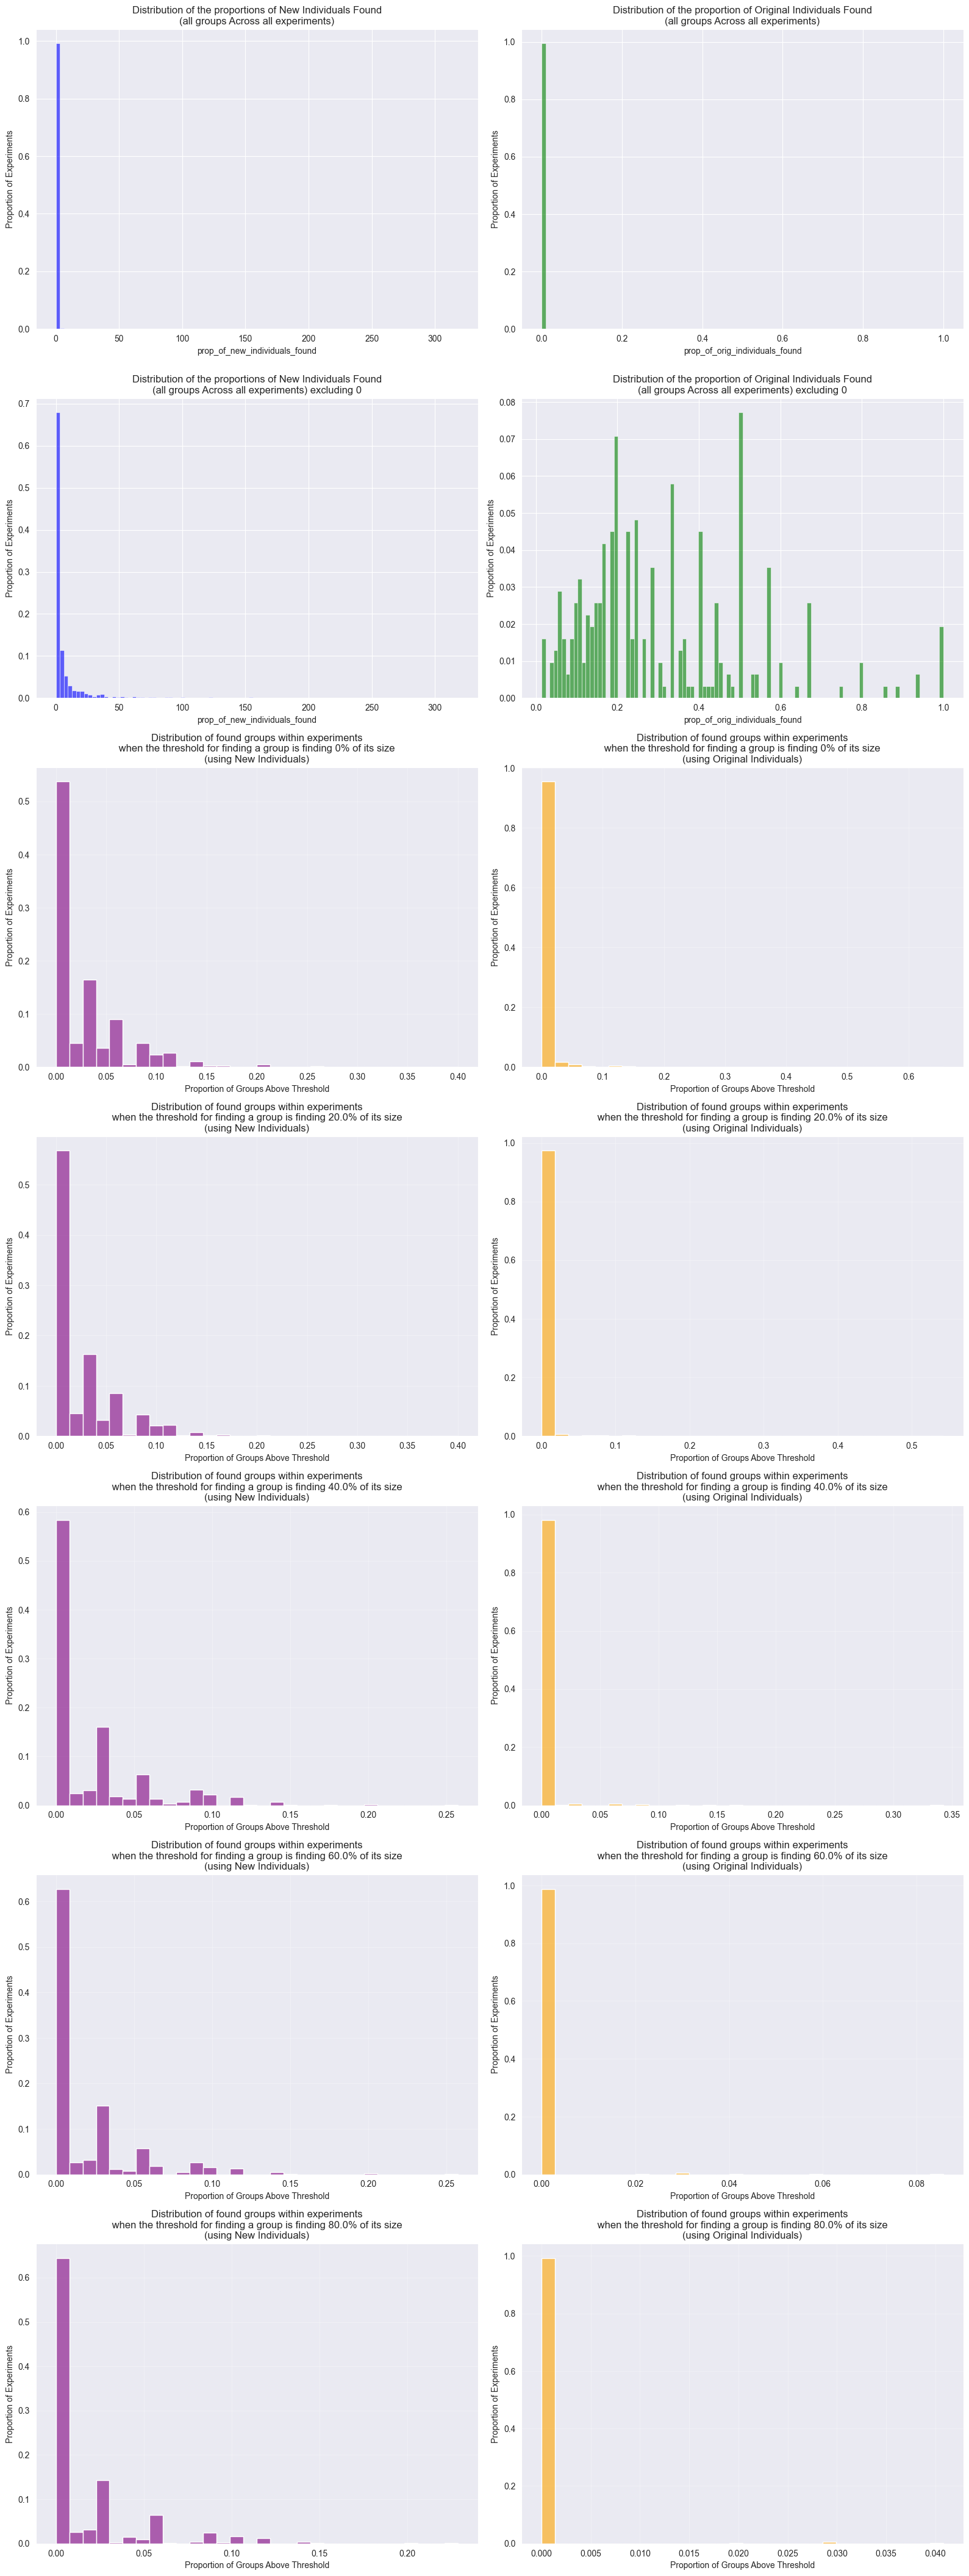

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate number of thresholds and adjust figure size accordingly
thresholds = [0, 0.2, 0.4, 0.6, 0.8]
n_thresholds = len(thresholds)
total_plots = 4 + 2 * n_thresholds  # 2 initial plots + 2 plots per threshold
n_rows = 4 + n_thresholds  # 2 rows for initial plots + 1 row per threshold

# Create figure and subplots
fig = plt.figure(figsize=(16, 6 * n_rows))
gs = fig.add_gridspec(n_rows, 2)

# First row: Raw distributions
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

# Plot 1: Raw distribution of new individuals found
sns.histplot(data=df, x='prop_of_new_individuals_found', bins=100, ax=ax1, color='blue', alpha=0.6, stat="proportion")
ax1.set_title('Distribution of the proportions of New Individuals Found\n(all groups Across all experiments)')
ax1.set_ylabel('Proportion of Experiments')

# Plot 2: Raw distribution of original individuals found
sns.histplot(data=df, x='prop_of_orig_individuals_found', bins=100, ax=ax2, color='green', alpha=0.6, stat="proportion")
ax2.set_title('Distribution of the proportion of Original Individuals Found\n(all groups Across all experiments)')
ax2.set_ylabel('Proportion of Experiments')

# Plot 3: Raw distribution of new individuals found (excluding 0)
sns.histplot(data=df[df['prop_of_new_individuals_found'] > 0], x='prop_of_new_individuals_found', bins=100, ax=ax3,
             color='blue', alpha=0.6, stat="proportion")
ax3.set_title(
    'Distribution of the proportions of New Individuals Found\n(all groups Across all experiments) excluding 0')
ax3.set_ylabel('Proportion of Experiments')

# Plot 4: Raw distribution of original individuals found (excluding 0)
sns.histplot(data=df[df['prop_of_orig_individuals_found'] > 0], x='prop_of_orig_individuals_found', bins=100, ax=ax4,
             color='green', alpha=0.6, stat="proportion")
ax4.set_title(
    'Distribution of the proportion of Original Individuals Found\n(all groups Across all experiments) excluding 0')
ax4.set_ylabel('Proportion of Experiments')


def df_new_avg_calc(threshold):
    return df.groupby('experiment_id')['prop_of_new_individuals_found'].apply(
        lambda x: (x > threshold).mean()
    ).reset_index(name='avg_new_proportion_above_threshold')


def df_orig_avg_calc(threshold):
    return df.groupby('experiment_id')['prop_of_orig_individuals_found'].apply(
        lambda x: (x > threshold).mean()
    ).reset_index(name='avg_orig_proportion_above_threshold')


# Create separate rows for each threshold
for i, thresh in enumerate(thresholds):
    # Create new axes for this threshold
    ax_new = fig.add_subplot(gs[i + 2, 0])
    ax_orig = fig.add_subplot(gs[i + 2, 1])

    # Plot distributions for new individuals
    sns.histplot(data=df_new_avg_calc(thresh),
                 x='avg_new_proportion_above_threshold',
                 bins=30, ax=ax_new, color='purple', alpha=0.6,
                 stat="proportion")
    ax_new.set_title(
        f'Distribution of found groups within experiments\n when the threshold for finding a group is finding {thresh * 100}% of its size \n(using New Individuals)',
        fontsize=12)
    ax_new.set_xlabel('Proportion of Groups Above Threshold')
    ax_new.set_ylabel('Proportion of Experiments')
    ax_new.grid(True, alpha=0.3)

    # Plot distributions for original individuals
    sns.histplot(data=df_orig_avg_calc(thresh),
                 x='avg_orig_proportion_above_threshold',
                 bins=30, ax=ax_orig, color='orange', alpha=0.6,
                 stat="proportion")
    ax_orig.set_title(
        f'Distribution of found groups within experiments\n when the threshold for finding a group is finding {thresh * 100}% of its size \n(using Original Individuals)',
        fontsize=12)
    ax_orig.set_xlabel('Proportion of Groups Above Threshold')
    ax_orig.set_ylabel('Proportion of Experiments')
    ax_orig.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

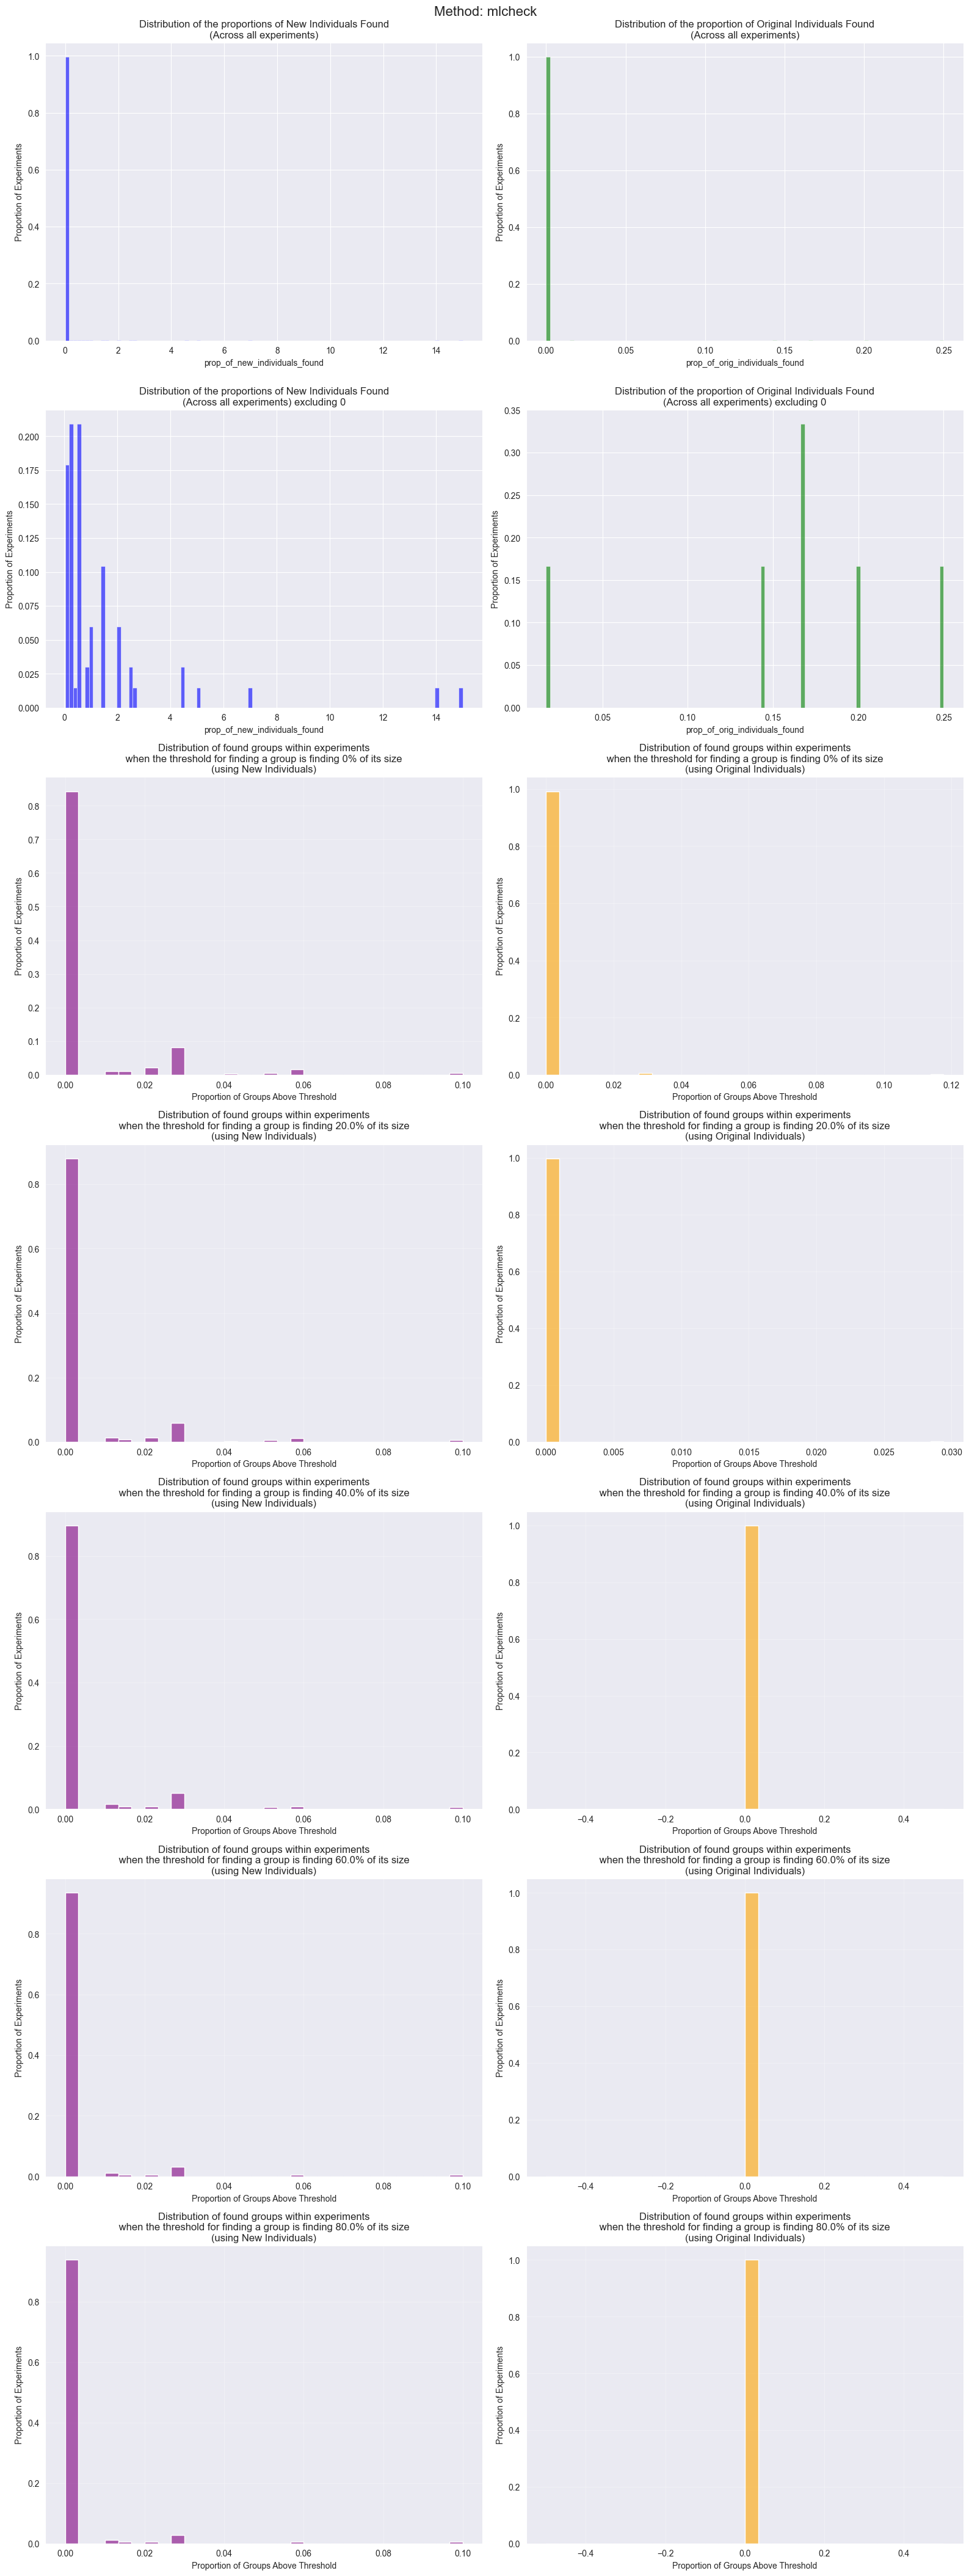

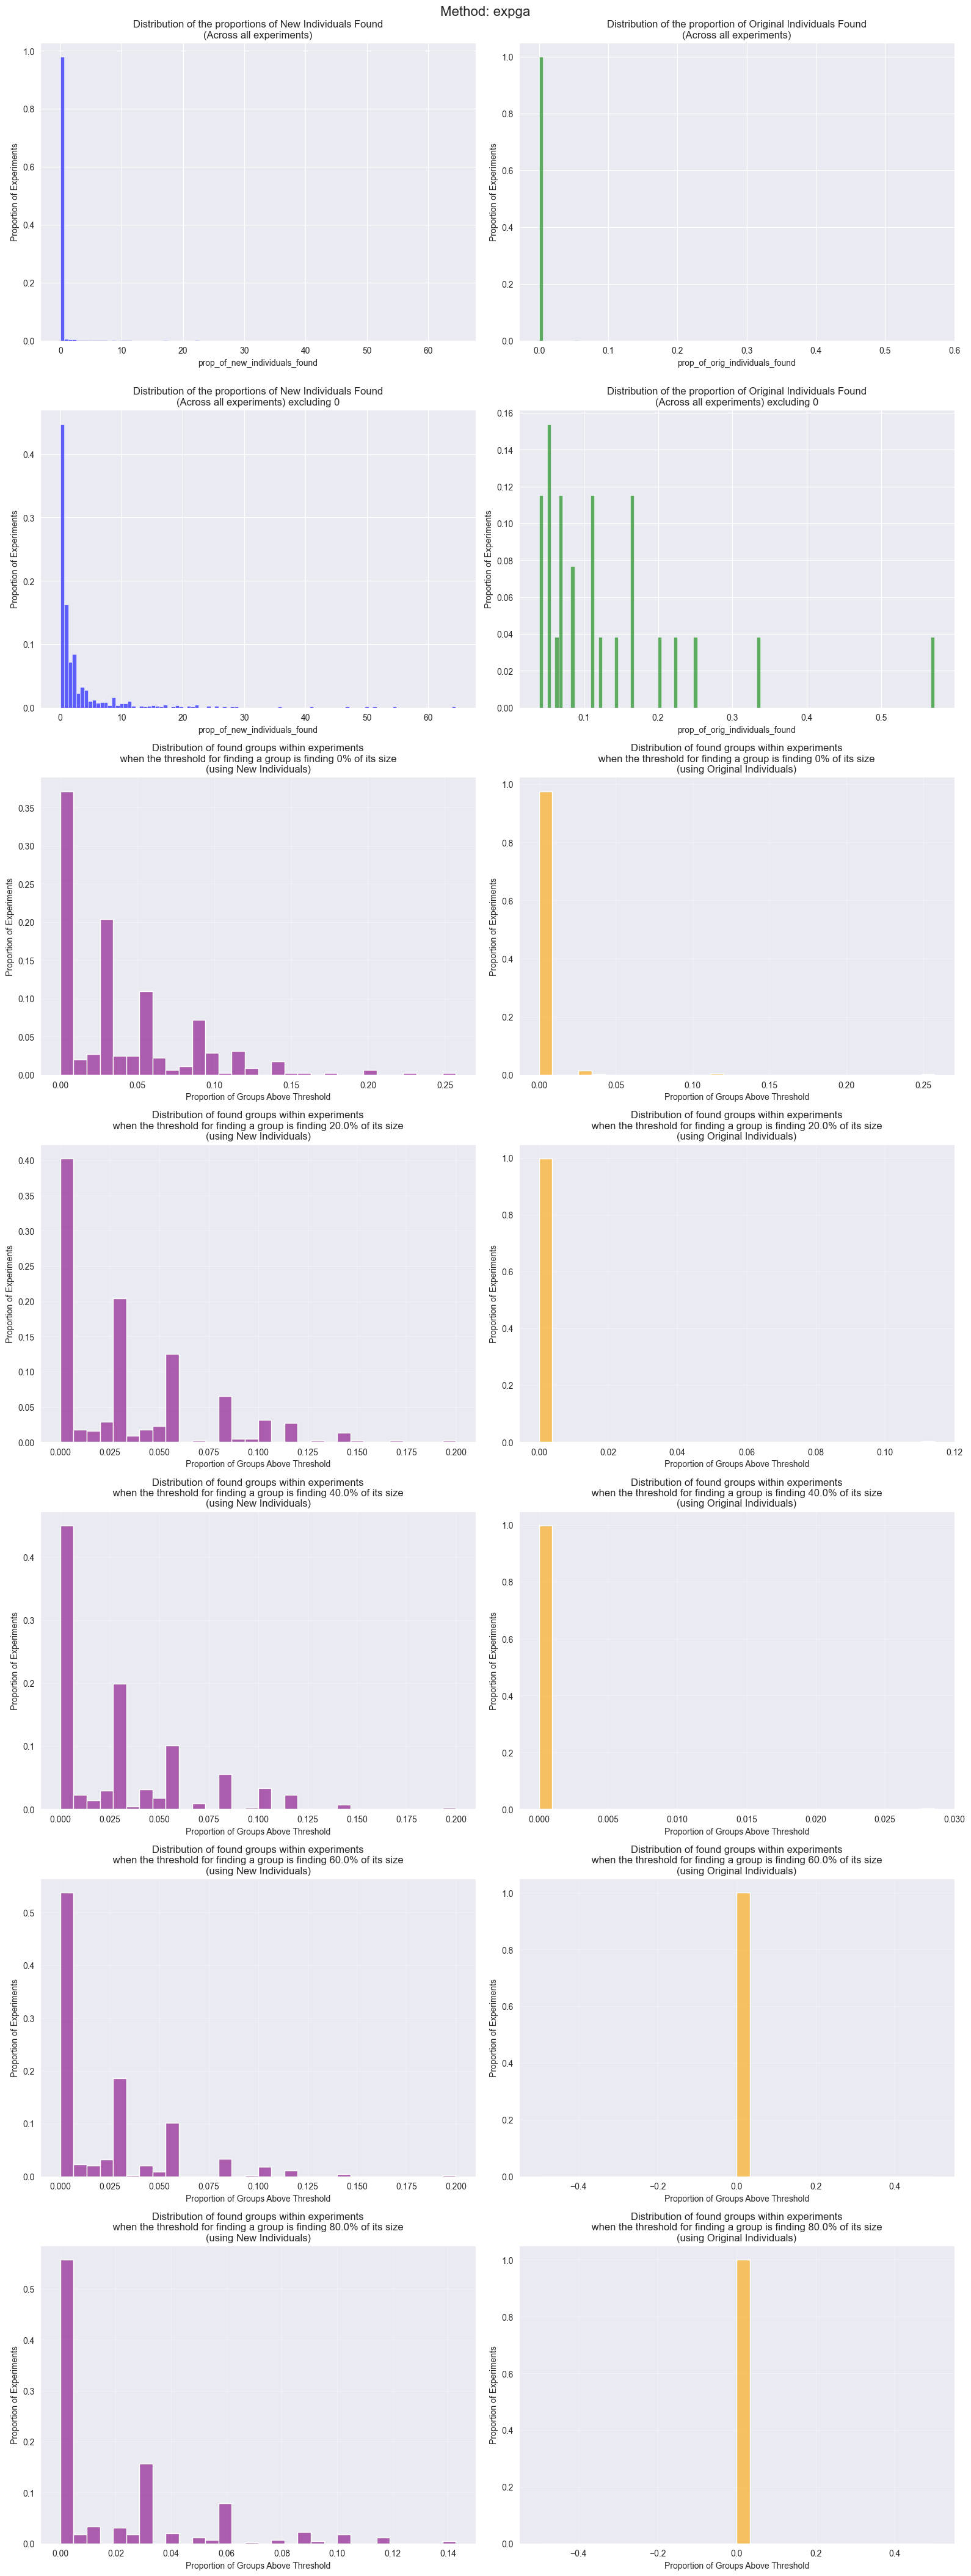

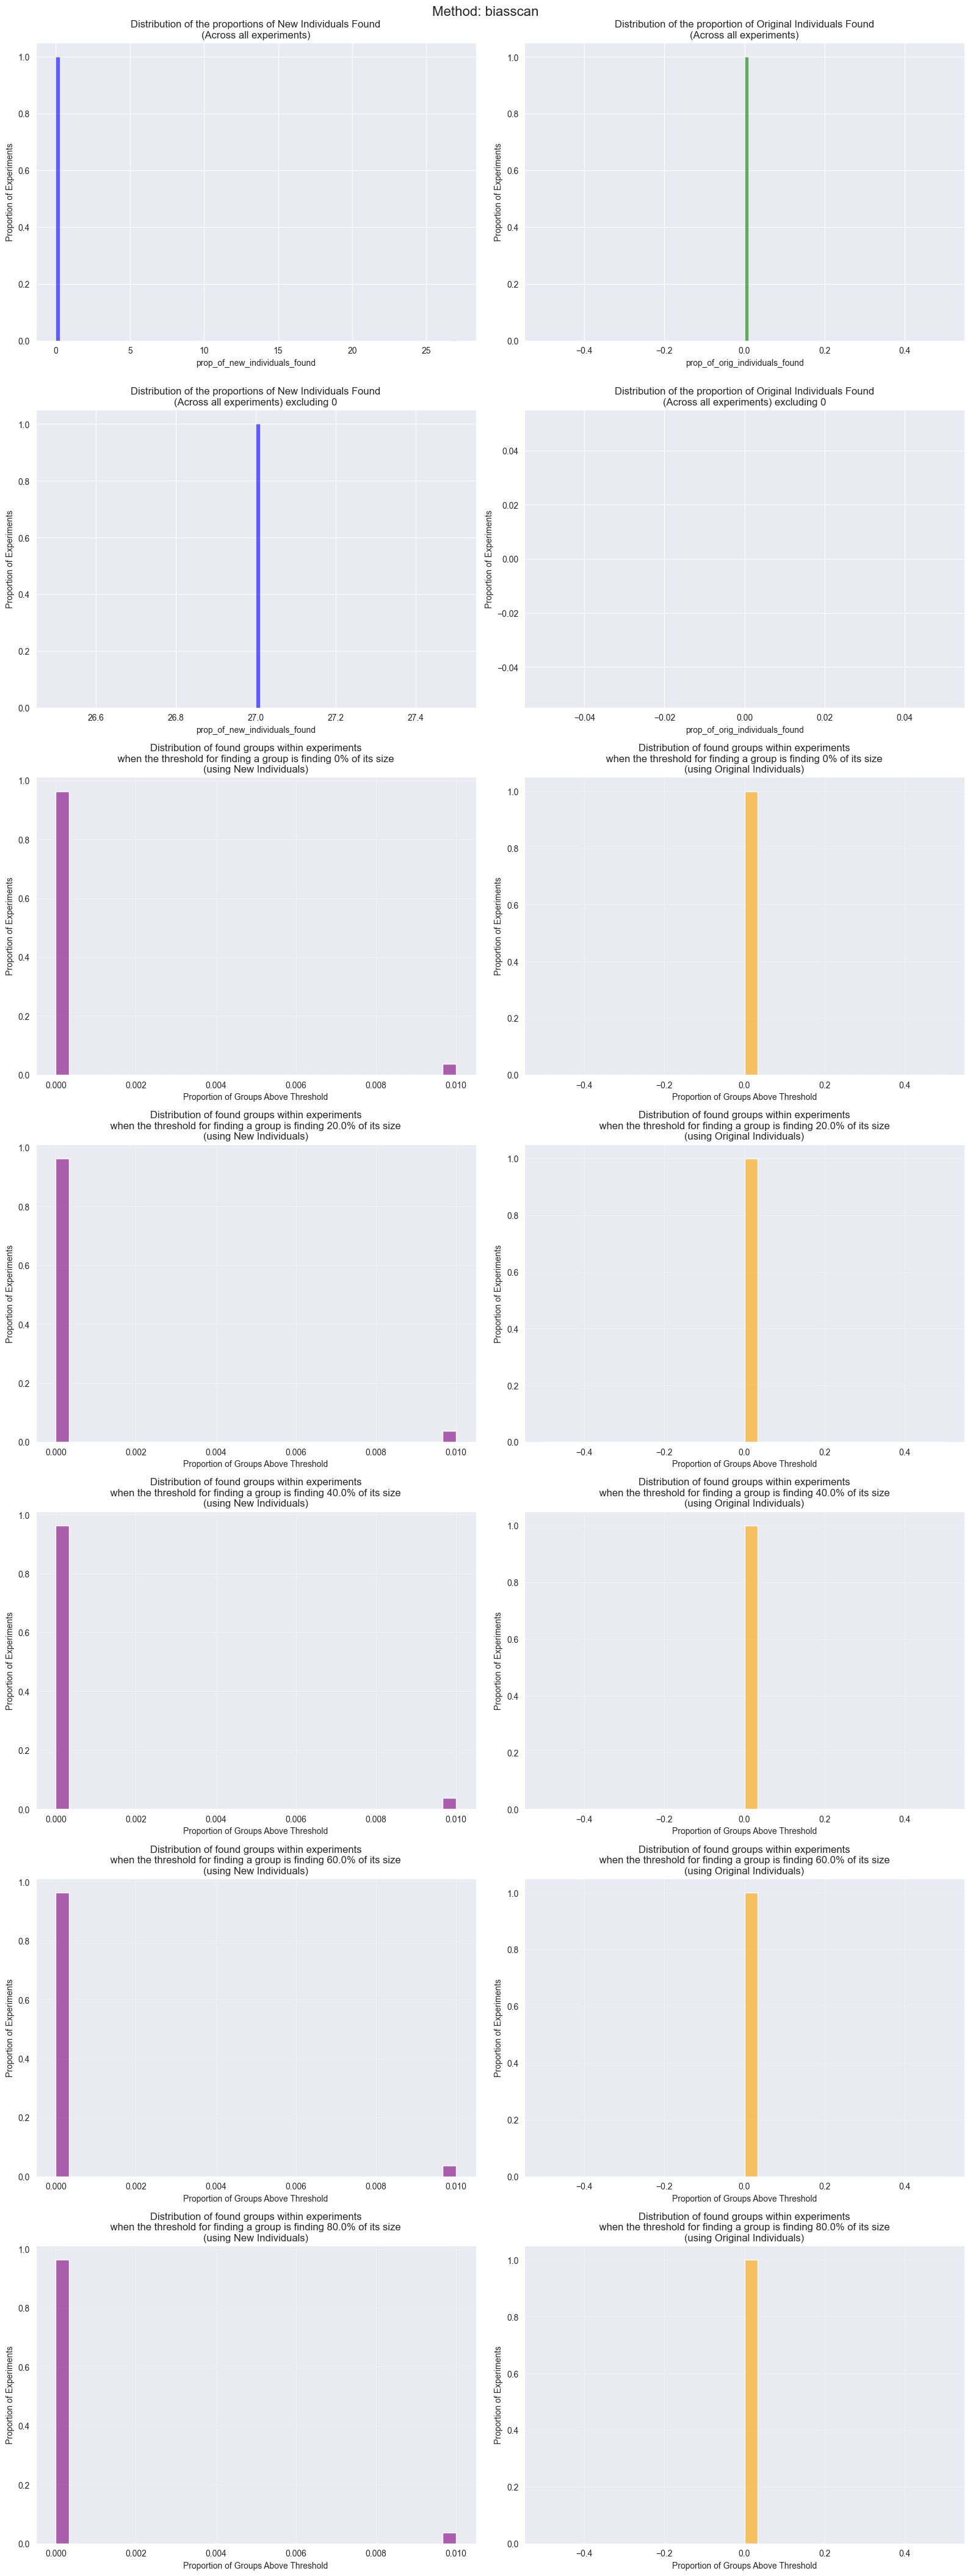

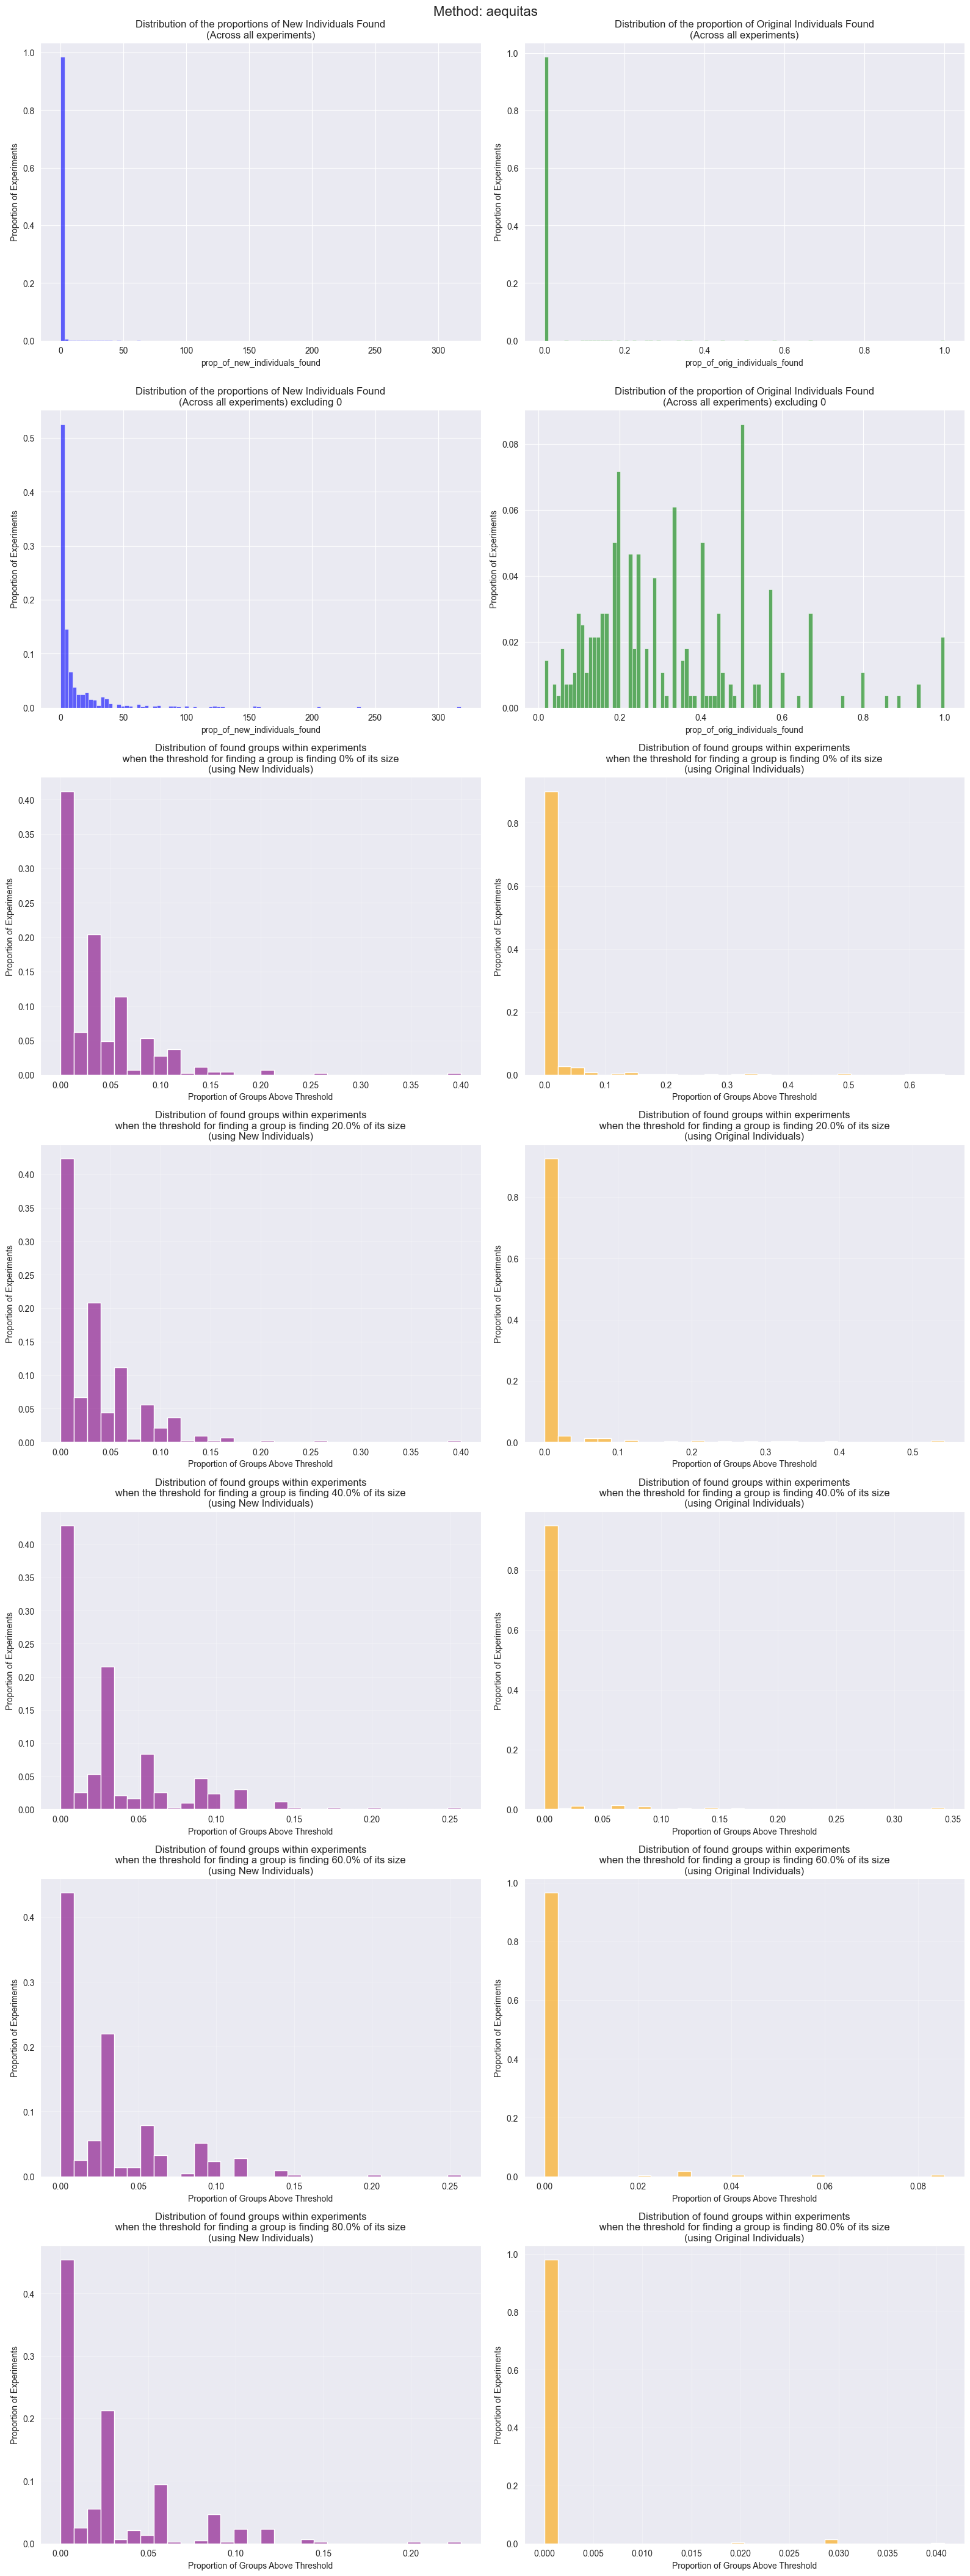

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get unique methods
methods = df['method_name'].unique()

for idx, method in enumerate(methods):
    # Filter data for this method
    method_df = df[df['method_name'] == method]

    # Calculate number of thresholds and adjust figure size accordingly
    thresholds = [0, 0.2, 0.4, 0.6, 0.8]
    n_thresholds = len(thresholds)
    total_plots = 4 + 2 * n_thresholds  # 2 initial plots + 2 plots per threshold
    n_rows = 4 + n_thresholds  # 2 rows for initial plots + 1 row per threshold

    # Create figure and subplots
    fig = plt.figure(figsize=(16, 6 * n_rows))
    fig.suptitle(f'Method: {method}', fontsize=16, y=0.995)
    gs = fig.add_gridspec(n_rows, 2)

    # First row: Raw distributions
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 0])
    ax4 = fig.add_subplot(gs[1, 1])

    # Plot 1: Raw distribution of new individuals found
    sns.histplot(data=method_df, x='prop_of_new_individuals_found', bins=100, ax=ax1, color='blue', alpha=0.6,
                 stat="proportion")
    ax1.set_title('Distribution of the proportions of New Individuals Found\n(Across all experiments)')
    ax1.set_ylabel('Proportion of Experiments')

    # Plot 2: Raw distribution of original individuals found
    sns.histplot(data=method_df, x='prop_of_orig_individuals_found', bins=100, ax=ax2, color='green', alpha=0.6,
                 stat="proportion")
    ax2.set_title('Distribution of the proportion of Original Individuals Found\n(Across all experiments)')
    ax2.set_ylabel('Proportion of Experiments')

    # Plot 3: Raw distribution of new individuals found (excluding 0)
    sns.histplot(data=method_df[method_df['prop_of_new_individuals_found'] > 0], x='prop_of_new_individuals_found',
                 bins=100, ax=ax3, color='blue', alpha=0.6, stat="proportion")
    ax3.set_title('Distribution of the proportions of New Individuals Found\n(Across all experiments) excluding 0')
    ax3.set_ylabel('Proportion of Experiments')

    # Plot 4: Raw distribution of original individuals found (excluding 0)
    sns.histplot(data=method_df[method_df['prop_of_orig_individuals_found'] > 0], x='prop_of_orig_individuals_found',
                 bins=100, ax=ax4, color='green', alpha=0.6, stat="proportion")
    ax4.set_title('Distribution of the proportion of Original Individuals Found\n(Across all experiments) excluding 0')
    ax4.set_ylabel('Proportion of Experiments')


    def df_new_avg_calc(df, threshold):
        return df.groupby('experiment_id')['prop_of_new_individuals_found'].apply(
            lambda x: (x > threshold).mean()
        ).reset_index(name='avg_new_proportion_above_threshold')


    def df_orig_avg_calc(df, threshold):
        return df.groupby('experiment_id')['prop_of_orig_individuals_found'].apply(
            lambda x: (x > threshold).mean()
        ).reset_index(name='avg_orig_proportion_above_threshold')


    # Create separate rows for each threshold
    for i, thresh in enumerate(thresholds):
        # Create new axes for this threshold
        ax_new = fig.add_subplot(gs[i + 2, 0])
        ax_orig = fig.add_subplot(gs[i + 2, 1])

        # Plot distributions for new individuals
        sns.histplot(data=df_new_avg_calc(method_df, thresh),
                     x='avg_new_proportion_above_threshold',
                     bins=30, ax=ax_new, color='purple', alpha=0.6,
                     stat="proportion")
        ax_new.set_title(
            f'Distribution of found groups within experiments\n when the threshold for finding a group is finding {thresh * 100}% of its size \n(using New Individuals)',
            fontsize=12)
        ax_new.set_xlabel('Proportion of Groups Above Threshold')
        ax_new.set_ylabel('Proportion of Experiments')
        ax_new.grid(True, alpha=0.3)

        # Plot distributions for original individuals
        sns.histplot(data=df_orig_avg_calc(method_df, thresh),
                     x='avg_orig_proportion_above_threshold',
                     bins=30, ax=ax_orig, color='orange', alpha=0.6,
                     stat="proportion")
        ax_orig.set_title(
            f'Distribution of found groups within experiments\n when the threshold for finding a group is finding {thresh * 100}% of its size \n(using Original Individuals)',
            fontsize=12)
        ax_orig.set_xlabel('Proportion of Groups Above Threshold')
        ax_orig.set_ylabel('Proportion of Experiments')
        ax_orig.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [6]:
# Select only numeric columns
df1 = df[
    [c for c in list(df.columns) if c.startswith('calculated') or c.startswith('num_exact_') or c == 'method_name']]
df1.head()

,method_name,calculated_aleatoric,calculated_aleatoric_max,calculated_aleatoric_median,calculated_aleatoric_min,calculated_epistemic,calculated_epistemic_max,calculated_epistemic_median,calculated_epistemic_min,calculated_granularity,calculated_group_size,calculated_intersectionality,calculated_magnitude,calculated_similarity,calculated_subgroup_ratio,calculated_uncertainty,num_exact_couple_matches
0,mlcheck,0.168950,0.230390,0.127443,0.087077,0.017118,0.120578,0.017560,0.014493,0.285714,0.009826,0.333333,0.880077,0.666667,1.415094,0.093034,0
1,mlcheck,0.152183,0.242816,0.242816,0.003637,0.005456,0.177163,0.001610,0.001610,0.428571,0.022261,0.333333,0.783055,0.250000,2.052632,0.078819,0
2,mlcheck,0.038890,0.057764,0.036717,0.036717,0.017830,0.192844,0.010265,0.010265,0.142857,0.029324,0.666667,0.973684,0.333333,1.010526,0.028360,0
3,mlcheck,0.018951,0.033706,0.018951,0.004195,0.076743,0.098974,0.076743,0.054511,0.285714,0.000461,0.666667,1.000000,0.000000,1.000000,0.047847,0
4,mlcheck,0.001403,0.009558,0.000000,0.000000,0.002500,0.124224,0.000000,0.000000,0.142857,0.030398,1.000000,0.991228,0.250000,2.473684,0.001951,0


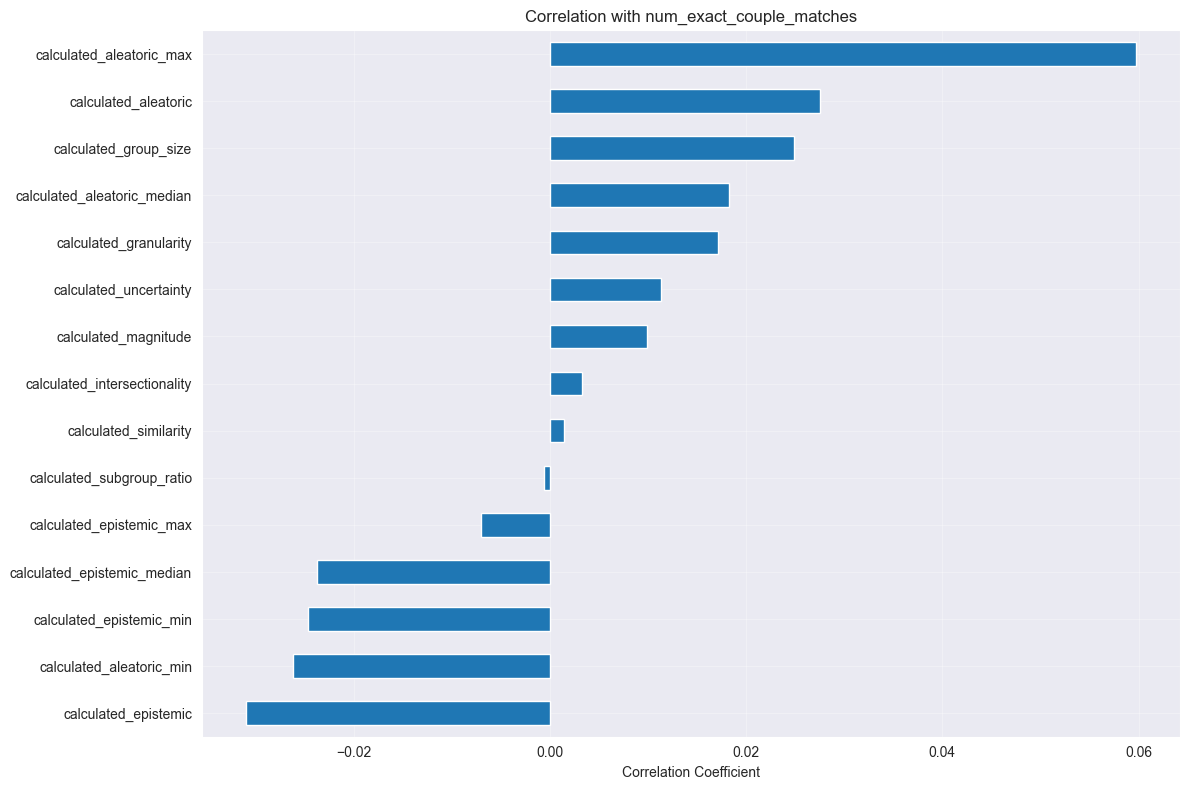

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_cols = df1.select_dtypes(include=[np.number]).columns
correlations = df1[numeric_cols].corr()['num_exact_couple_matches'].sort_values()

correlations = correlations.drop('num_exact_couple_matches')

# Create a figure with a larger size
plt.figure(figsize=(12, 8))

# Create horizontal bar plot
correlations.plot(kind='barh')

# Customize the plot
plt.title('Correlation with num_exact_couple_matches')
plt.xlabel('Correlation Coefficient')
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

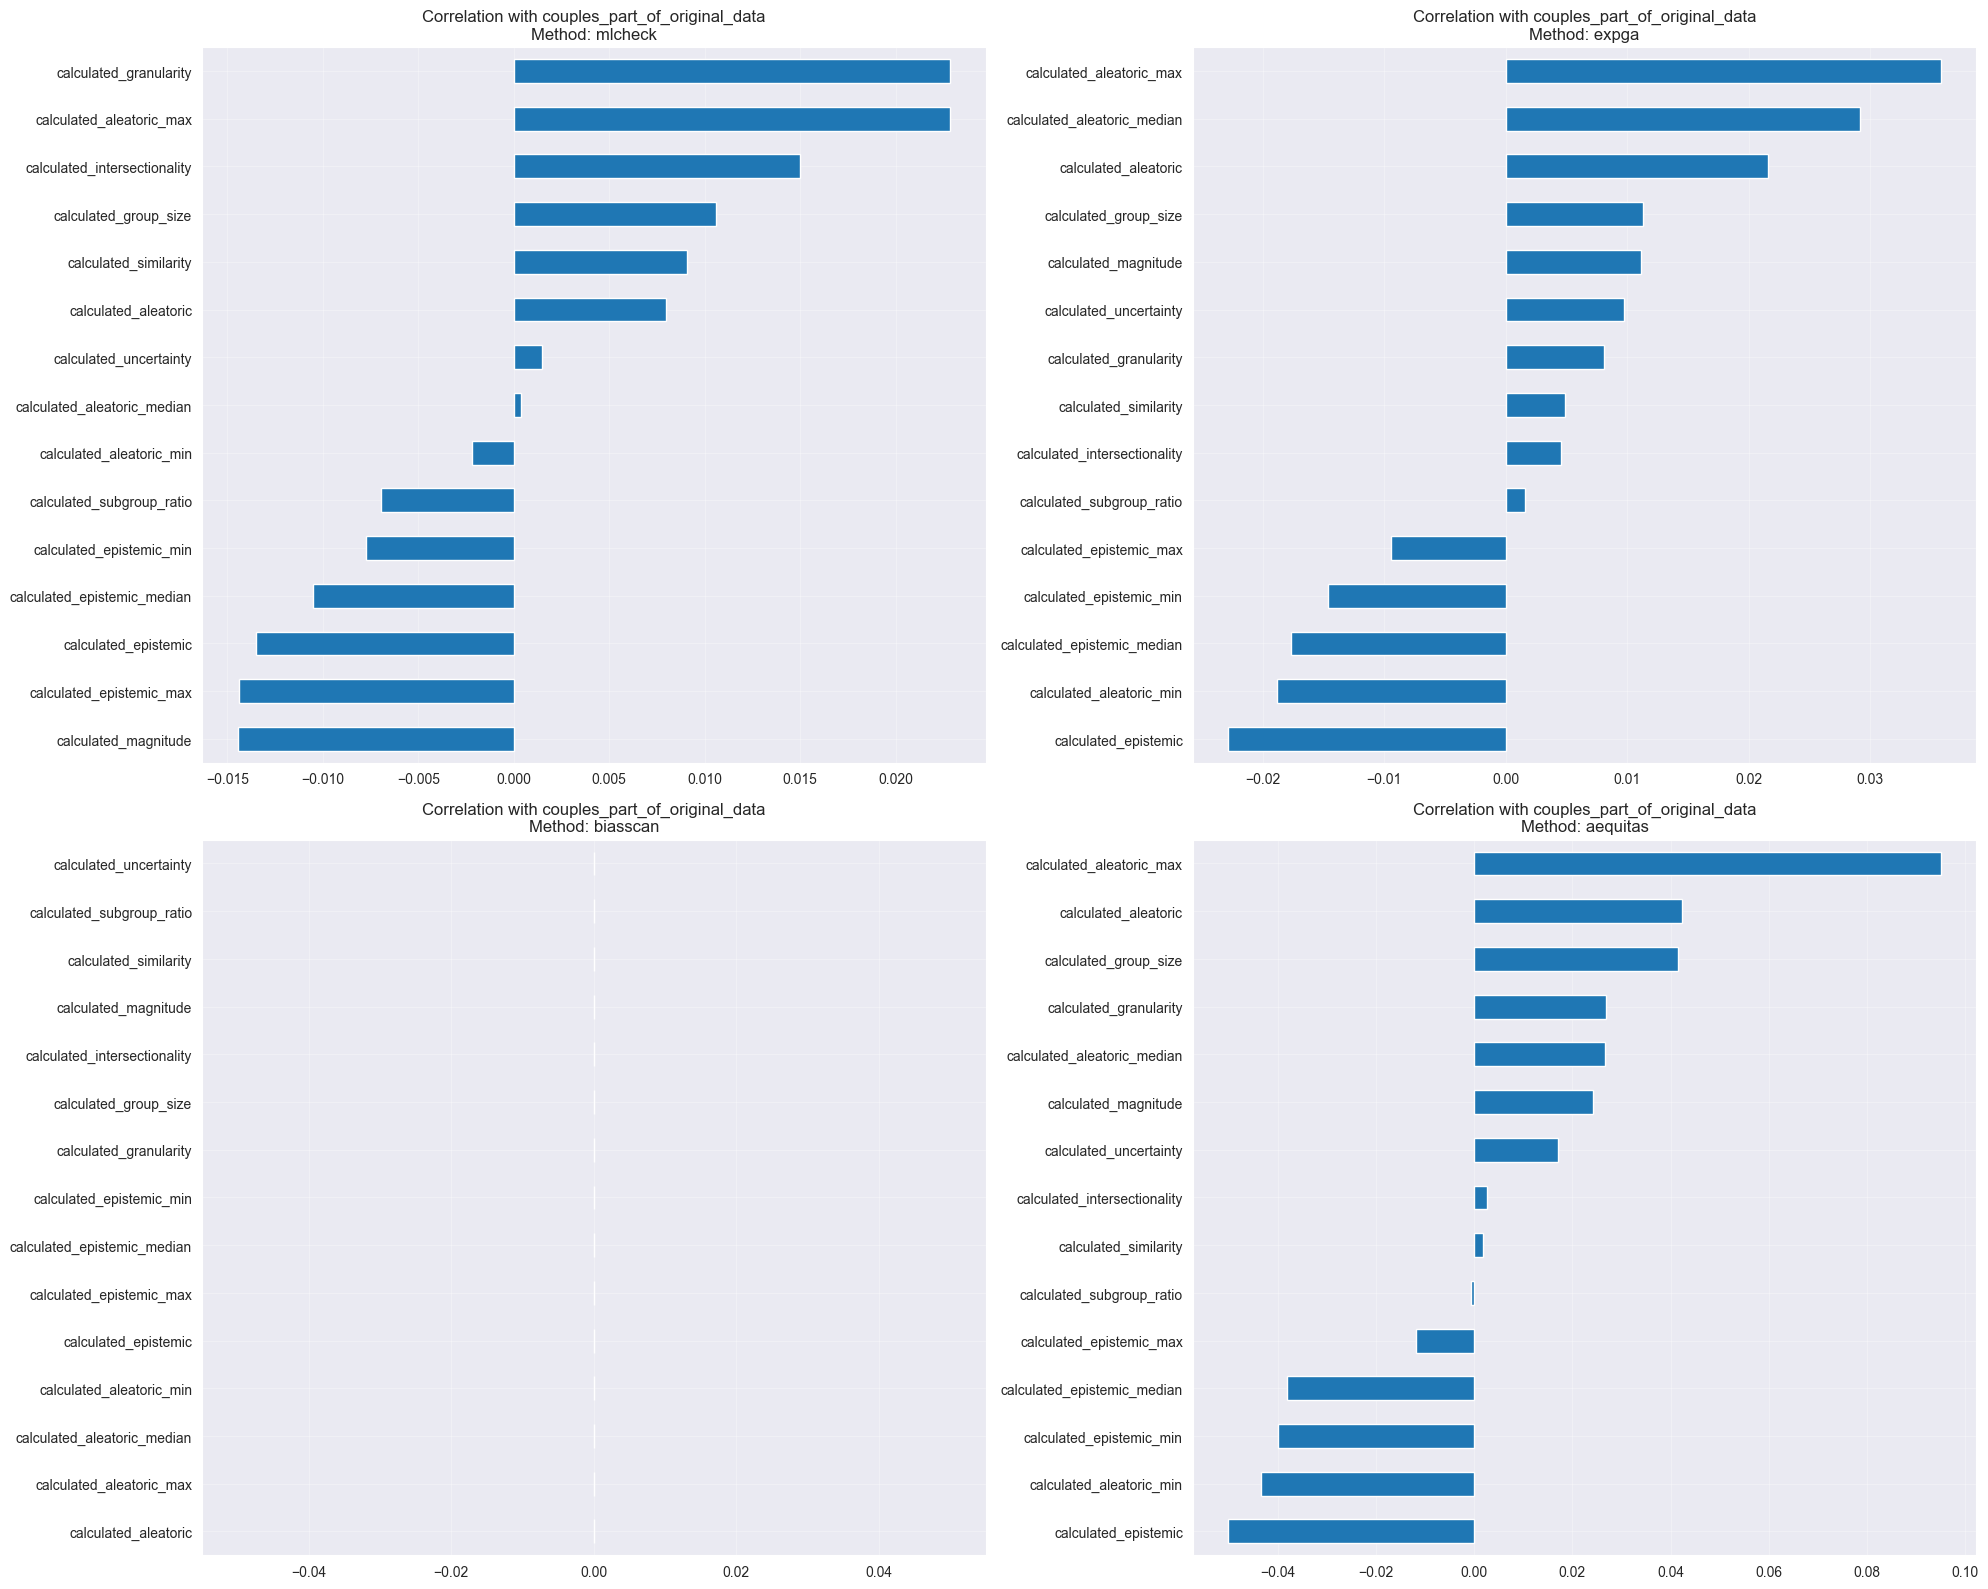

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique methods
methods = df1['method_name'].unique()

# Create a figure with subplots - one for each method
fig, axs = plt.subplots(2, 2, figsize=(20, 16))
axs = axs.ravel()  # Flatten the 2x2 array for easier indexing

# For each method
for idx, method in enumerate(methods):
    # Filter data for this method
    method_df = df1[df1['method_name'] == method]

    # Get numeric columns
    numeric_cols = method_df.select_dtypes(include=[np.number]).columns

    # Calculate correlations
    correlations = method_df[numeric_cols].corr()['num_exact_couple_matches'].sort_values()
    correlations = correlations.drop('num_exact_couple_matches')

    # Plot on corresponding subplot
    correlations.plot(kind='barh', ax=axs[idx])
    axs[idx].set_title(f'Correlation with couples_part_of_original_data\nMethod: {method}')
    axs[idx].grid(True, alpha=0.3)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
df2 = df[[c for c in list(df.columns) if c.startswith('calculated') or c.startswith('num_new_') or c == 'method_name']]
df2.head()

,method_name,calculated_aleatoric,calculated_aleatoric_max,calculated_aleatoric_median,calculated_aleatoric_min,calculated_epistemic,calculated_epistemic_max,calculated_epistemic_median,calculated_epistemic_min,calculated_granularity,calculated_group_size,calculated_intersectionality,calculated_magnitude,calculated_similarity,calculated_subgroup_ratio,calculated_uncertainty,num_new_group_couples
0,mlcheck,0.168950,0.230390,0.127443,0.087077,0.017118,0.120578,0.017560,0.014493,0.285714,0.009826,0.333333,0.880077,0.666667,1.415094,0.093034,0
1,mlcheck,0.152183,0.242816,0.242816,0.003637,0.005456,0.177163,0.001610,0.001610,0.428571,0.022261,0.333333,0.783055,0.250000,2.052632,0.078819,0
2,mlcheck,0.038890,0.057764,0.036717,0.036717,0.017830,0.192844,0.010265,0.010265,0.142857,0.029324,0.666667,0.973684,0.333333,1.010526,0.028360,0
3,mlcheck,0.018951,0.033706,0.018951,0.004195,0.076743,0.098974,0.076743,0.054511,0.285714,0.000461,0.666667,1.000000,0.000000,1.000000,0.047847,0
4,mlcheck,0.001403,0.009558,0.000000,0.000000,0.002500,0.124224,0.000000,0.000000,0.142857,0.030398,1.000000,0.991228,0.250000,2.473684,0.001951,0


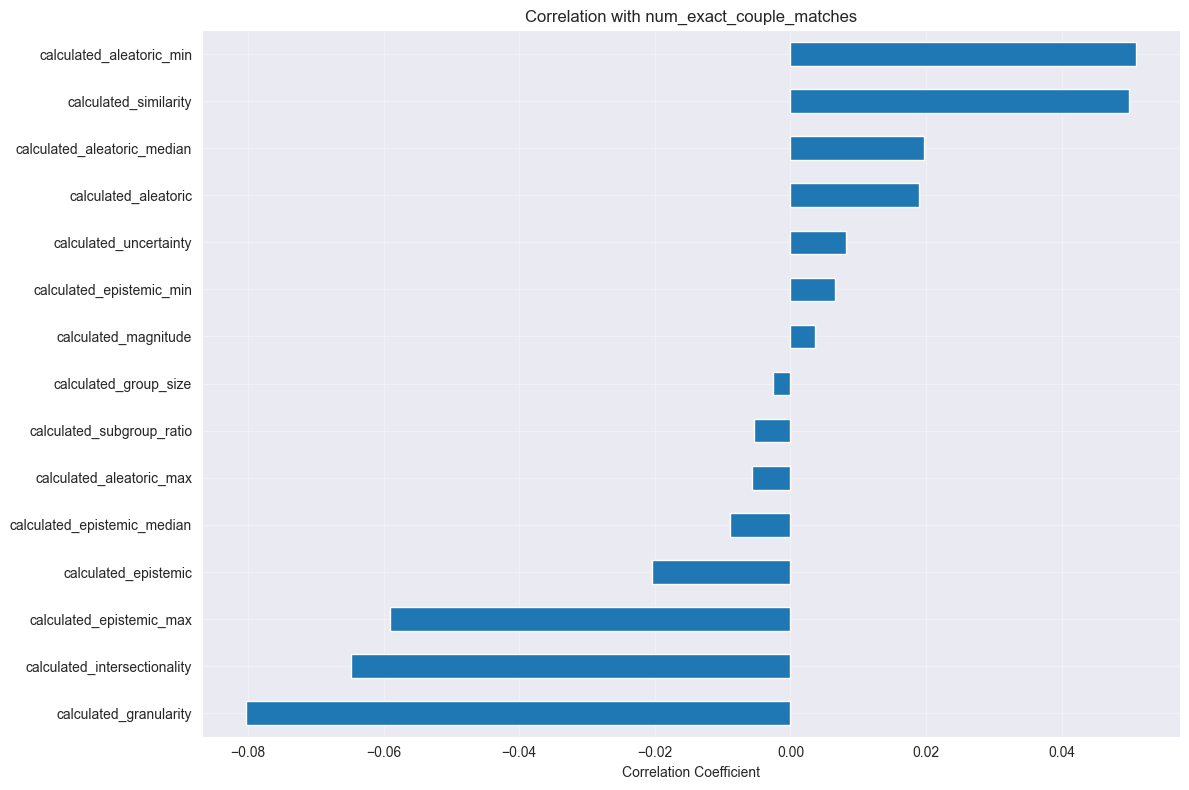

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_cols = df2.select_dtypes(include=[np.number]).columns
correlations = df2[numeric_cols].corr()['num_new_group_couples'].sort_values()

correlations = correlations.drop('num_new_group_couples')

# Create a figure with a larger size
plt.figure(figsize=(12, 8))

# Create horizontal bar plot
correlations.plot(kind='barh')

# Customize the plot
plt.title('Correlation with num_exact_couple_matches')
plt.xlabel('Correlation Coefficient')
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

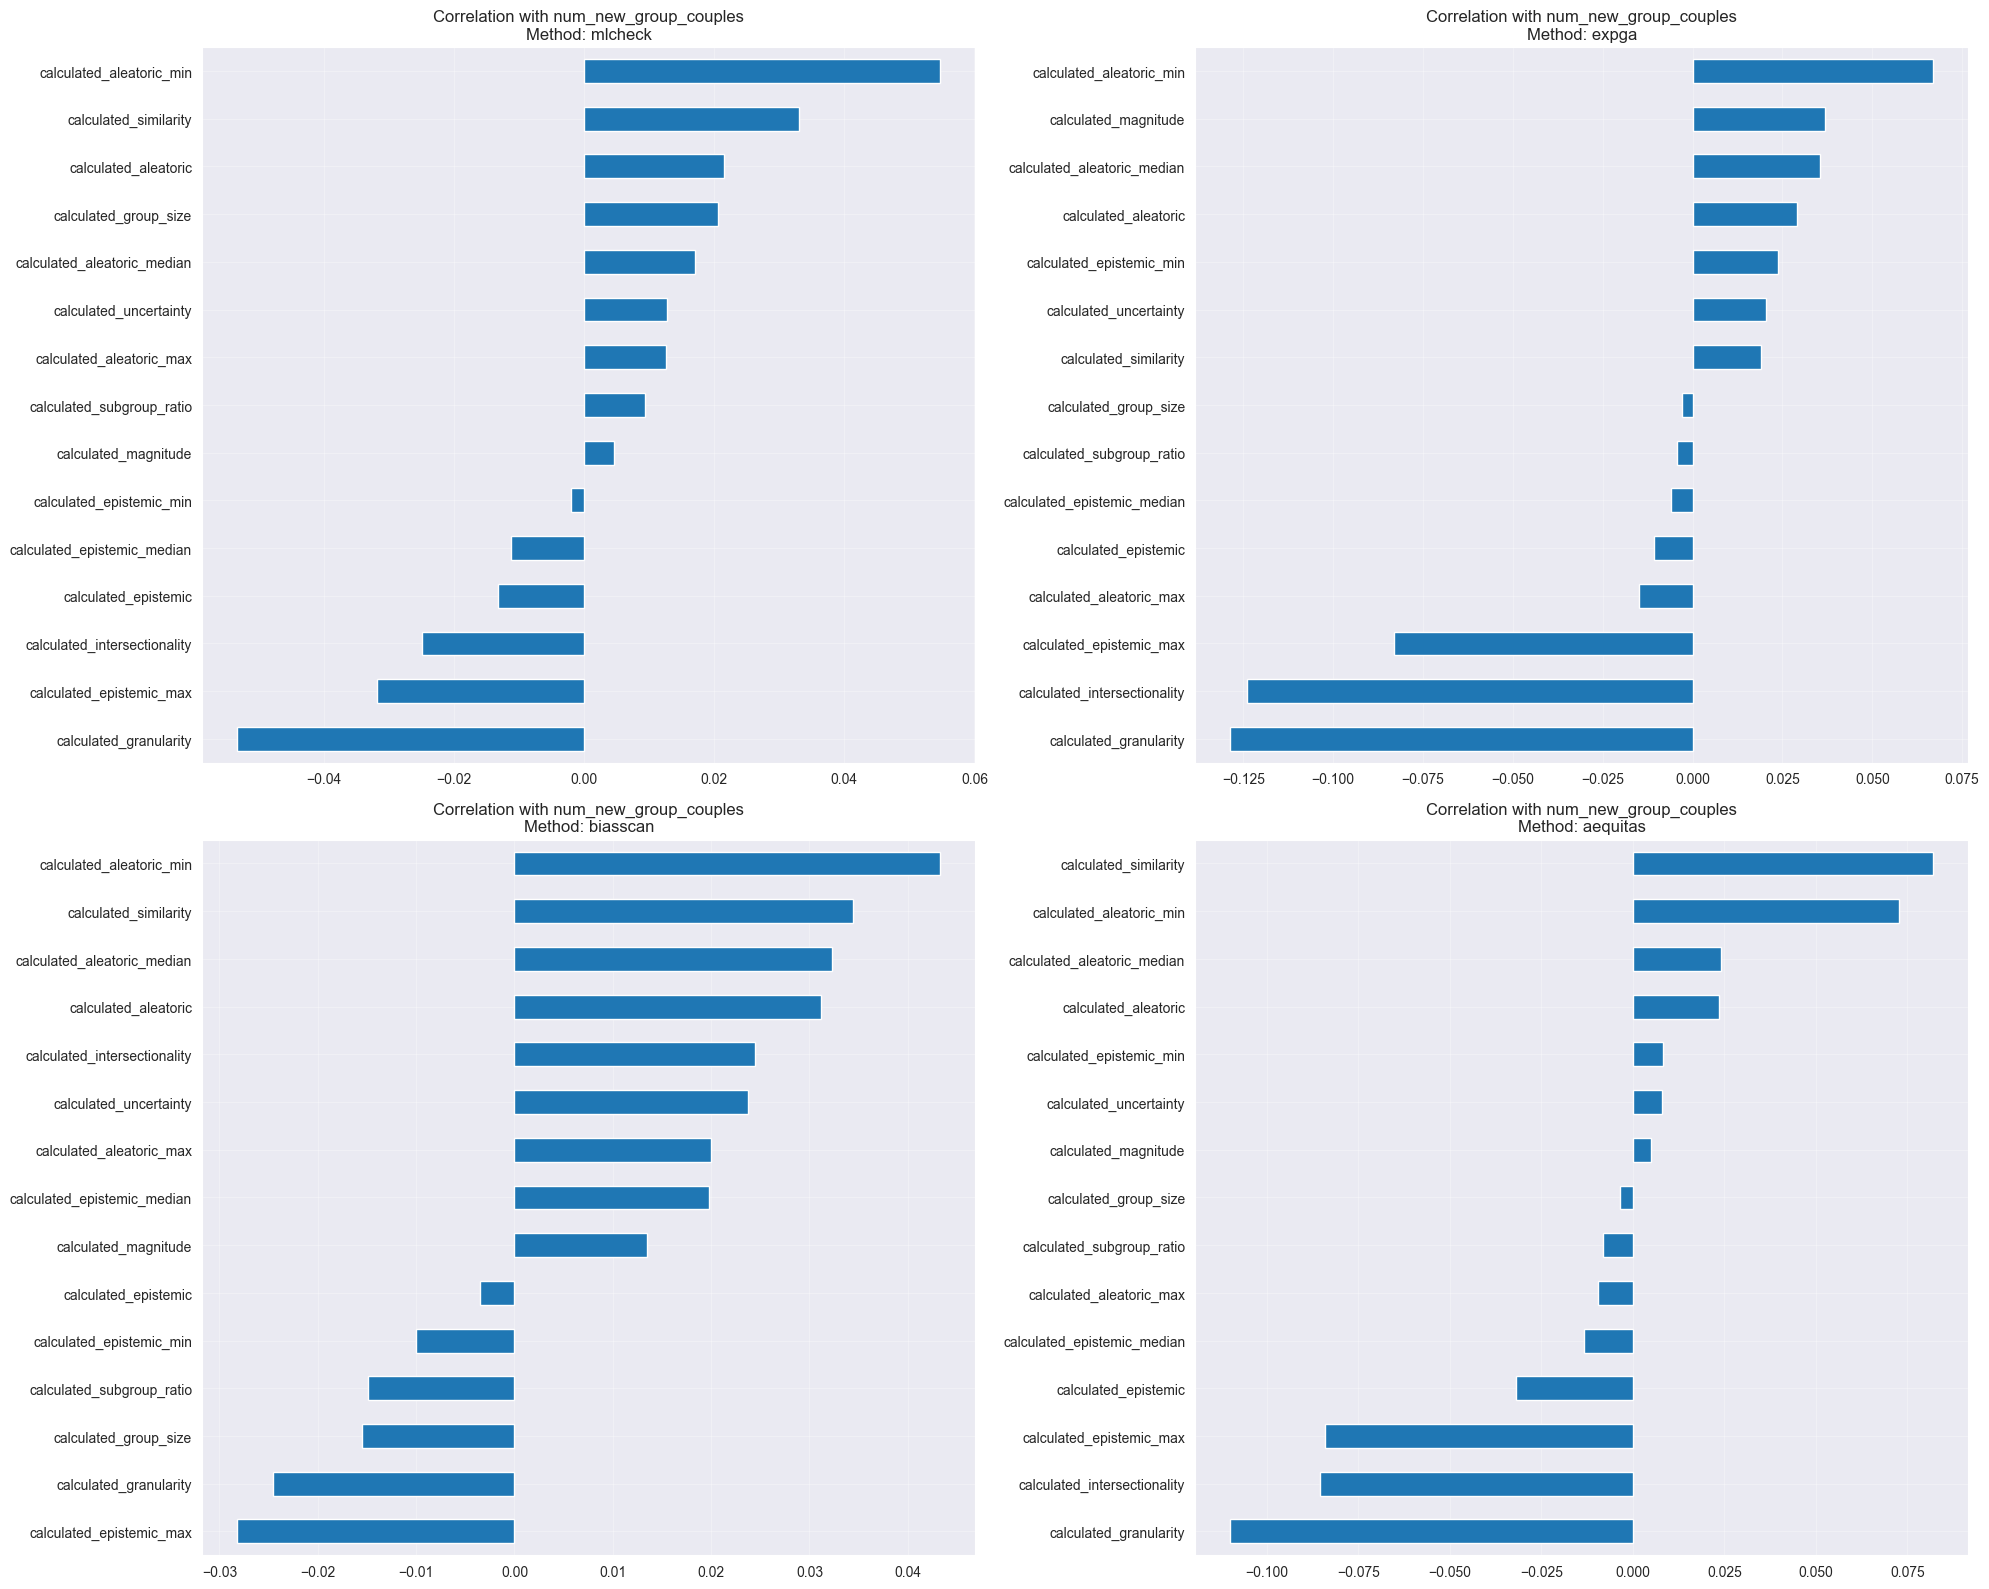

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique methods
methods = df2['method_name'].unique()

# Create a figure with subplots - one for each method
fig, axs = plt.subplots(2, 2, figsize=(20, 16))
axs = axs.ravel()  # Flatten the 2x2 array for easier indexing

# For each method
for idx, method in enumerate(methods):
    # Filter data for this method
    method_df = df2[df2['method_name'] == method]

    # Get numeric columns
    numeric_cols = method_df.select_dtypes(include=[np.number]).columns

    # Calculate correlations
    correlations = method_df[numeric_cols].corr()['num_new_group_couples'].sort_values()
    correlations = correlations.drop('num_new_group_couples')

    # Plot on corresponding subplot
    correlations.plot(kind='barh', ax=axs[idx])
    axs[idx].set_title(f'Correlation with num_new_group_couples\nMethod: {method}')
    axs[idx].grid(True, alpha=0.3)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')


# Prepare the data
def prepare_data(df):
    # Create copy to avoid modifying original
    df_copy = df.copy()

    # Convert categorical variables to numeric
    categorical_columns = df_copy.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        df_copy[col] = pd.factorize(df_copy[col])[0]
    # Remove excluded columns and target variable
    X = df_copy[
        [c for c in list(df.columns) if c.startswith('calculated') or c.startswith('num_exact_') or c == 'method_name']]
    y = df_copy['num_exact_couple_matches']

    return X, y


# Calculate CATE for each feature
def calculate_cate(model, X, feature_name):
    X_plus = X.copy()
    X_minus = X.copy()

    # Calculate standard deviation of the feature
    std_dev = X[feature_name].std()

    # Create variations
    X_plus[feature_name] = X[feature_name] + std_dev
    X_minus[feature_name] = X[feature_name] - std_dev

    # Predict for both variations
    pred_plus = model.predict(X_plus)
    pred_minus = model.predict(X_minus)

    # Calculate average treatment effect
    cate = np.mean(pred_plus - pred_minus)

    return cate


# Prepare the data
X, y = prepare_data(df)

# Train random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Calculate CATE for each feature
cate_results = []
for feature in X.columns:
    cate = calculate_cate(model, X, feature)
    cate_results.append({
        'feature': feature,
        'cate': abs(cate)  # Use absolute value for magnitude of effect
    })

# Create results DataFrame and sort by absolute CATE value
results_df = pd.DataFrame(cate_results)
results_df = results_df.sort_values('cate', ascending=False)

# Calculate feature importances from random forest
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
importances = importances.sort_values('importance', ascending=False)

print("Top 10 Features by CATE Analysis:")
print(results_df.head(10))
print("\nTop 10 Features by Random Forest Importance:")
print(importances.head(10))

Top 10 Features by CATE Analysis:
                        feature      cate
10        calculated_group_size  0.000024
14    calculated_subgroup_ratio  0.000020
12         calculated_magnitude  0.000017
8      calculated_epistemic_min  0.000012
16     num_exact_couple_matches  0.000009
1          calculated_aleatoric  0.000009
5          calculated_epistemic  0.000008
4      calculated_aleatoric_min  0.000008
7   calculated_epistemic_median  0.000007
2      calculated_aleatoric_max  0.000006

Top 10 Features by Random Forest Importance:
                        feature  importance
16     num_exact_couple_matches    0.998992
14    calculated_subgroup_ratio    0.000207
15       calculated_uncertainty    0.000154
10        calculated_group_size    0.000104
12         calculated_magnitude    0.000092
1          calculated_aleatoric    0.000090
2      calculated_aleatoric_max    0.000081
3   calculated_aleatoric_median    0.000080
13        calculated_similarity    0.000047
5          calcula

In [13]:
import json
random_experiment_id = 'bff3c337-f2f1-4e05-bcdd-75bb09a874a4'
df_synth = pd.read_sql_query(
    f"SELECT experiment_id, full_data FROM synthetic_data where experiment_id='{random_experiment_id}'", conn)
df_synth = pd.DataFrame(json.loads(df_synth['full_data'].iloc[0]))
df_synth['experiment_id'] = random_experiment_id
df_synth.head()

,Attr1_X,Attr2_X,Attr3_X,Attr4_X,Attr5_X,Attr1_T,Attr2_T,Attr3_T,Attr4_T,Attr5_T,...,actual_mean_diff_outcome,relevance,calculated_magnitude,calculated_group_size,calculated_granularity,calculated_intersectionality,calculated_uncertainty,calculated_similarity,calculated_subgroup_ratio,experiment_id
106,0,0,0,0,0,0,0,0,1,0,...,0.5,0.567423,0.5,0.049351,0.2,0.2,0.002579,0.0,2.8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4
107,0,0,0,0,0,0,0,0,1,0,...,0.5,0.567423,0.5,0.049351,0.2,0.2,0.002579,0.0,2.8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4
108,0,0,0,0,0,0,0,0,1,0,...,0.5,0.567423,0.5,0.049351,0.2,0.2,0.002579,0.0,2.8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4
109,0,0,0,0,0,0,0,0,1,0,...,0.5,0.567423,0.5,0.049351,0.2,0.2,0.002579,0.0,2.8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4
110,0,0,0,0,0,0,0,0,1,0,...,0.5,0.567423,0.5,0.049351,0.2,0.2,0.002579,0.0,2.8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4


In [14]:
random_experiment_id = 'bff3c337-f2f1-4e05-bcdd-75bb09a874a4'
df_result = pd.read_sql_query(
    f"SELECT * FROM augmented_results ar left join main.analysis_metadata am on am.analysis_id=ar.analysis_id where experiment_id='{random_experiment_id}'", conn)
df_result_data = pd.DataFrame(list(df_result['data'].apply(json.loads)))
df_result = pd.concat([df_result.reset_index(drop=True), df_result_data.reset_index(drop=True)], axis=1)
df_result.head()

,analysis_id,indv_key,couple_key,is_original_data,is_individual_part_of_a_group,is_couple_part_of_a_group,matching_groups,data,analysis_id,experiment_id,...,Attr1_T,Attr2_T,Attr2_X,Attr3_T,Attr3_X,Attr4_X,Attr5_X,Attr4_T,Attr5_T,outcome
0,e8fa4983-30ed-4e09-a286-427e84c323f8,2|4|0|4|4|1|0|2|0|5,2|4|0|4|4|1|0|2|0|5-2|0|0|4|4|1|0|2|0|5,0,0,0,[],"{""Attr1_X"": 2, ""Attr1_T"": 4, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,4,0,4,4,1,0,2,0,5,0
1,e8fa4983-30ed-4e09-a286-427e84c323f8,2|0|0|4|4|1|0|2|0|5,2|0|0|4|4|1|0|2|0|5-2|4|0|4|4|1|0|2|0|5,0,0,0,[],"{""Attr1_X"": 2, ""Attr1_T"": 0, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,0,0,4,4,1,0,2,0,5,3
2,e8fa4983-30ed-4e09-a286-427e84c323f8,2|0|0|4|3|0|3|2|4|2,2|0|0|4|3|0|3|2|4|2-2|3|0|4|3|0|3|2|4|2,0,0,0,[],"{""Attr1_X"": 2, ""Attr1_T"": 0, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,0,0,4,3,0,3,2,4,2,1
3,e8fa4983-30ed-4e09-a286-427e84c323f8,2|3|0|4|3|0|3|2|4|2,2|3|0|4|3|0|3|2|4|2-2|0|0|4|3|0|3|2|4|2,0,0,0,[],"{""Attr1_X"": 2, ""Attr1_T"": 3, ""Attr2_T"": 0, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,3,0,4,3,0,3,2,4,2,3
4,e8fa4983-30ed-4e09-a286-427e84c323f8,0|2|3|3|2|1|3|1|2|2,0|2|3|3|2|1|3|1|2|2-0|0|3|3|2|1|3|1|2|2,0,0,0,[],"{""Attr1_X"": 0, ""Attr1_T"": 2, ""Attr2_T"": 3, ""At...",e8fa4983-30ed-4e09-a286-427e84c323f8,bff3c337-f2f1-4e05-bcdd-75bb09a874a4,...,2,3,3,2,1,3,1,2,2,1


In [16]:
import pandas as pd
import numpy as np
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

train_cols = [c for c in df_synth.columns if c.startswith('Attr')]

original_data = df_synth[train_cols].copy()
result_data = df_result[train_cols+['is_original_data', 'is_couple_part_of_a_group']].copy()
n_neighbors=15
min_dist=0.1
random_state=42

# Remove the special columns from result_data for UMAP
special_cols = ['is_original_data', 'is_couple_part_of_a_group']
result_features = result_data.drop(columns=special_cols)

# Get numeric columns (excluding special columns)
numeric_cols = original_data.select_dtypes(include=[np.number]).columns
original_features = original_data[numeric_cols]
result_features = result_features[numeric_cols]

# Scale both datasets using the same scaler (fit on original data)
scaler = StandardScaler()
original_scaled = scaler.fit_transform(original_features)
result_scaled = scaler.transform(result_features)

# Fit UMAP on original data and transform both datasets
umap_model = UMAP(n_neighbors=n_neighbors,
                  min_dist=min_dist,
                  random_state=random_state,
                  verbose=True)
original_embedding = umap_model.fit_transform(original_scaled)
result_embedding = umap_model.transform(result_scaled)


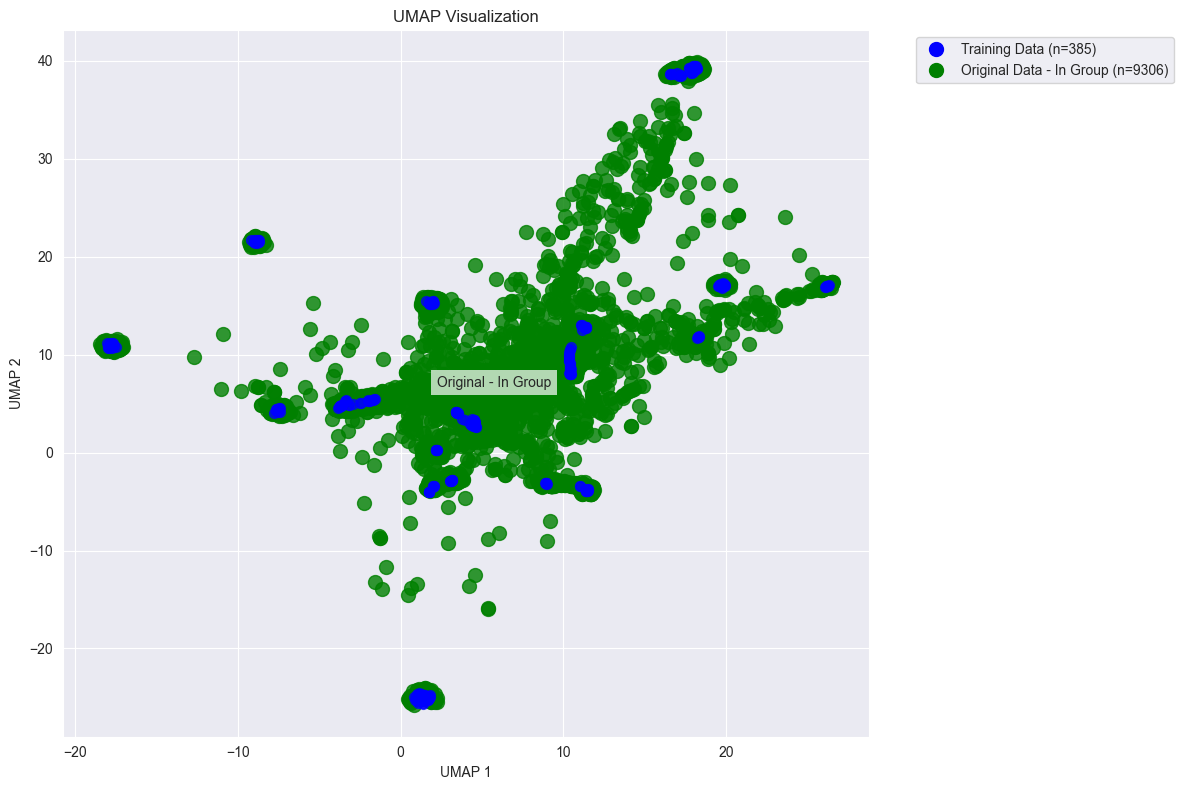

In [20]:
# Create the plot
plt.figure(figsize=(12, 8))

# Split result data into different categories for layered plotting
is_original = result_data['is_original_data'] != 0
is_group = result_data['is_couple_part_of_a_group'] != 0

# Create masks for different combinations
mask_not_original_not_group = (~is_original) & (~is_group)
mask_not_original_is_group = (~is_original) & is_group
mask_is_original_not_group = is_original & (~is_group)
mask_is_original_is_group = is_original & is_group

# Function to calculate centroid of points
def get_centroid(points):
    if len(points) > 0:
        return np.mean(points[:, 0]), np.mean(points[:, 1])
    return None, None

# Plot layers from bottom to top
# 1. Not original and not group (red crosses)
if np.any(mask_not_original_not_group):
    points = result_embedding[mask_not_original_not_group]
    plt.scatter(points[:, 0], points[:, 1],
               color='red', marker='o', s=100, alpha=0.6,
               label='New Data - Not in Group')
    # Add label at centroid
    x_center, y_center = get_centroid(points)
    if x_center is not None:
        plt.text(x_center, y_center, 'New - Not in Group',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
                ha='center', va='center')

# 3. Original but not in group (red circles)
if np.any(mask_is_original_not_group):
    points = result_embedding[mask_is_original_not_group]
    plt.scatter(points[:, 0], points[:, 1],
               color='red', marker='o', s=100, alpha=0.6,
               label='Original Data - Not in Group')
    # Add label at centroid
    x_center, y_center = get_centroid(points)
    if x_center is not None:
        plt.text(x_center, y_center, 'Original - Not in Group',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
                ha='center', va='center')

# 2. Not original but in group (green crosses)
if np.any(mask_not_original_is_group):
    points = result_embedding[mask_not_original_is_group]
    plt.scatter(points[:, 0], points[:, 1],
               color='green', marker='o', s=100, alpha=0.6,
               label='New Data - In Group')
    # Add label at centroid
    x_center, y_center = get_centroid(points)
    if x_center is not None:
        plt.text(x_center, y_center, 'New - In Group',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
                ha='center', va='center')

# 4. Original and in group (green circles) - top layer
if np.any(mask_is_original_is_group):
    points = result_embedding[mask_is_original_is_group]
    plt.scatter(points[:, 0], points[:, 1],
               color='green', marker='o', s=100, alpha=0.8,
               label='Original Data - In Group')
    # Add label at centroid
    x_center, y_center = get_centroid(points)
    if x_center is not None:
        plt.text(x_center, y_center, 'Original - In Group',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
                ha='center', va='center')

# Plot original data in blue (bottom layer)
plt.scatter(original_embedding[:, 0], original_embedding[:, 1],
           color='blue', alpha=0.7, label='Training Data',
           marker='o', s=50)

# Add counts to the legend
legend_elements = []
counts = {
    'Training Data': len(original_embedding),
    'Original Data - In Group': np.sum(mask_is_original_is_group),
    'Original Data - Not in Group': np.sum(mask_is_original_not_group),
    'New Data - In Group': np.sum(mask_not_original_is_group),
    'New Data - Not in Group': np.sum(mask_not_original_not_group)
}

# Create custom legend with counts
for label, count in counts.items():
    if count > 0:  # Only show categories that have data points
        legend_elements.append(plt.Line2D([0], [0], marker='o' if 'Original' in label or 'Training' in label else 'x',
                                       color='blue' if 'Training' in label else ('green' if 'In Group' in label else 'red'),
                                       label=f'{label} (n={count})',
                                       markersize=10, linestyle='None'))

plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('UMAP Visualization')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.tight_layout()